# Lab: Clustering Algorithms with Scikit Learn
<img src="IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

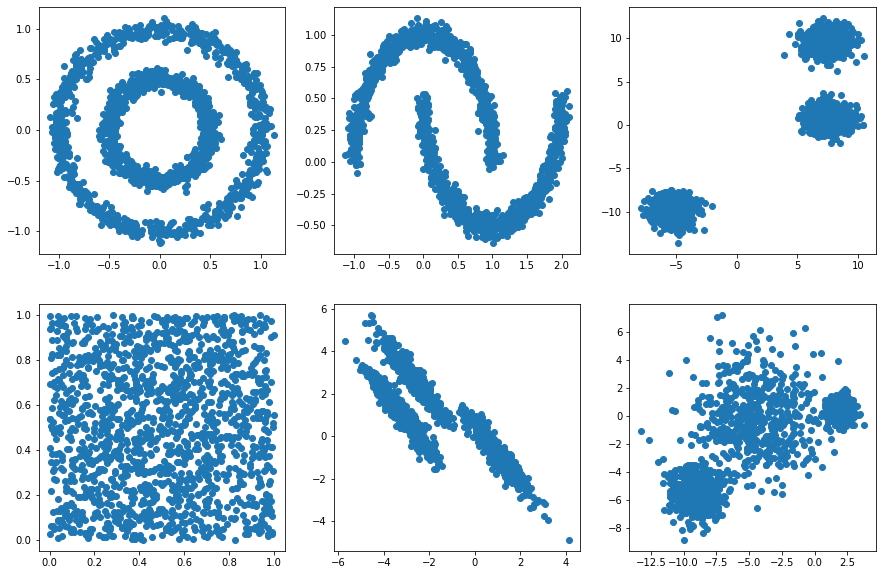

In [3]:
fig, axs = plt.subplots(2,3, figsize=(15,10))

axs[0][0].scatter(A[:,0],A[:,1])
axs[0][1].scatter(B[:,0],B[:,1])
axs[0][2].scatter(C[:,0],C[:,1])

axs[1][0].scatter(D[:,0],D[:,1])
axs[1][1].scatter(E[:,0],E[:,1])
axs[1][2].scatter(F[:,0],F[:,1]);

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

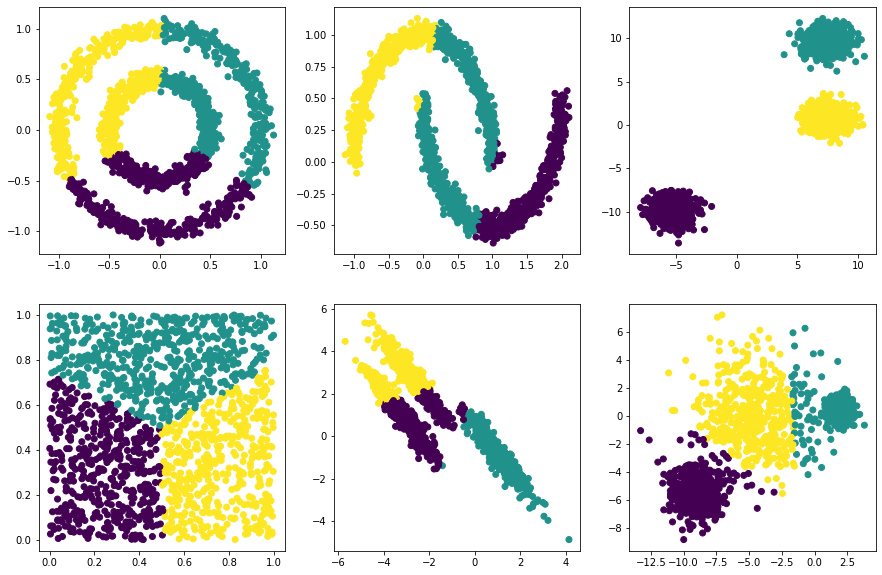

In [6]:
from sklearn.cluster import KMeans

fig, axs = plt.subplots(2,3, figsize=(15,10))
# create axs index list to access indexes of subplots inside the loop
axs_idx_lst = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
axs_idx_ctr = 0

n_clusters = 3

# loop over all datasets
for dataset in [A, B, C, D, E, F]:
    # perform kmeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dataset)
    # add labels to existing dataset
    dataset = np.hstack((dataset, np.atleast_2d(kmeans.labels_).T))
    
    # select index for subplot
    axs_idx_x = axs_idx_lst[axs_idx_ctr][0]
    axs_idx_y = axs_idx_lst[axs_idx_ctr][1]
    
    # plot samples of dataset for each label individually
    #for cluster in range(n_clusters):
    #    axs[axs_idx_x][axs_idx_y].scatter(dataset[dataset[:,2] == cluster][:,0], dataset[dataset[:,2] == cluster][:,1])
    
    axs[axs_idx_x][axs_idx_y].scatter(dataset[:,0], dataset[:,1], c=dataset[:,2])
    axs_idx_ctr += 1


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

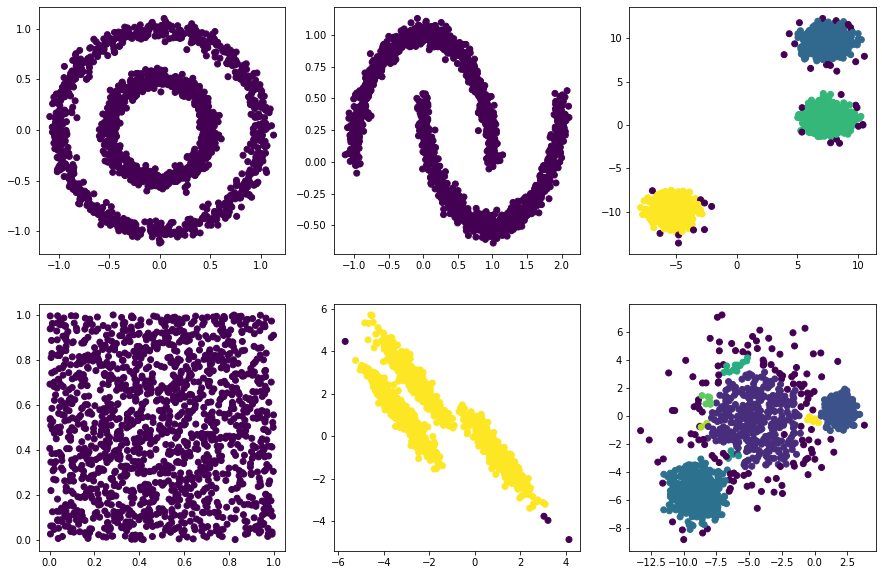

In [8]:
from sklearn.cluster import DBSCAN

fig, axs = plt.subplots(2,3, figsize=(15,10))
# create axs index list to access indexes of subplots inside the loop
axs_idx_lst = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
axs_idx_ctr = 0

# loop over all datasets
for dataset in [A, B, C, D, E, F]:
    # perform kmeans clustering
    dbscan = DBSCAN().fit(dataset)
    # add labels to existing dataset
    dataset = np.hstack((dataset, np.atleast_2d(dbscan.labels_).T))
    
    # select index for subplot
    axs_idx_x = axs_idx_lst[axs_idx_ctr][0]
    axs_idx_y = axs_idx_lst[axs_idx_ctr][1]
    
    # plot samples of dataset for each label individually
    #for cluster in range(n_clusters):
    #    axs[axs_idx_x][axs_idx_y].scatter(dataset[dataset[:,2] == cluster][:,0], dataset[dataset[:,2] == cluster][:,1])
    
    axs[axs_idx_x][axs_idx_y].scatter(dataset[:,0], dataset[:,1], c=dataset[:,2])
    axs_idx_ctr += 1


## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score